In [34]:
import pandas as pd # used to load, manipulate the data and for one-hot encoding
import numpy as np # data manipulation
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample # for downsample the dataset
from sklearn.model_selection import train_test_split # for splitting the dataset into train and test split
from sklearn.preprocessing import scale # scale and center the data
from sklearn.svm import SVC # will make a SVM for classification
from sklearn.model_selection import GridSearchCV # will do the cross validation
from sklearn.metrics import plot_confusion_matrix # will draw the confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [36]:
# Read data in the excel file
data = pd.read_csv("oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [37]:
df.shape

(373, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [39]:
pd.set_option('display.max_columns', None) # will show the all columns with pandas dataframe
pd.set_option('display.max_rows', None) # will show the all rows with pandas dataframe

In [40]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [41]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
# data['Group'] = data['Group'].replace(['Converted'], ['Demented']) # Target variable
# data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    int64  
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    int64  
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 43.8+ KB


In [42]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.778049
M/F         0.222146
SES         0.062463
ASF         0.032495
Age        -0.005941
eTIV       -0.042700
Visit      -0.095507
MR Delay   -0.120638
EDUC       -0.193060
nWBV       -0.311346
MMSE       -0.524775
Name: Group, dtype: float64

array([[<AxesSubplot:xlabel='Group', ylabel='Group'>,
        <AxesSubplot:xlabel='CDR', ylabel='Group'>,
        <AxesSubplot:xlabel='M/F', ylabel='Group'>,
        <AxesSubplot:xlabel='SES', ylabel='Group'>,
        <AxesSubplot:xlabel='ASF', ylabel='Group'>],
       [<AxesSubplot:xlabel='Group', ylabel='CDR'>,
        <AxesSubplot:xlabel='CDR', ylabel='CDR'>,
        <AxesSubplot:xlabel='M/F', ylabel='CDR'>,
        <AxesSubplot:xlabel='SES', ylabel='CDR'>,
        <AxesSubplot:xlabel='ASF', ylabel='CDR'>],
       [<AxesSubplot:xlabel='Group', ylabel='M/F'>,
        <AxesSubplot:xlabel='CDR', ylabel='M/F'>,
        <AxesSubplot:xlabel='M/F', ylabel='M/F'>,
        <AxesSubplot:xlabel='SES', ylabel='M/F'>,
        <AxesSubplot:xlabel='ASF', ylabel='M/F'>],
       [<AxesSubplot:xlabel='Group', ylabel='SES'>,
        <AxesSubplot:xlabel='CDR', ylabel='SES'>,
        <AxesSubplot:xlabel='M/F', ylabel='SES'>,
        <AxesSubplot:xlabel='SES', ylabel='SES'>,
        <AxesSubplot:xlabel='

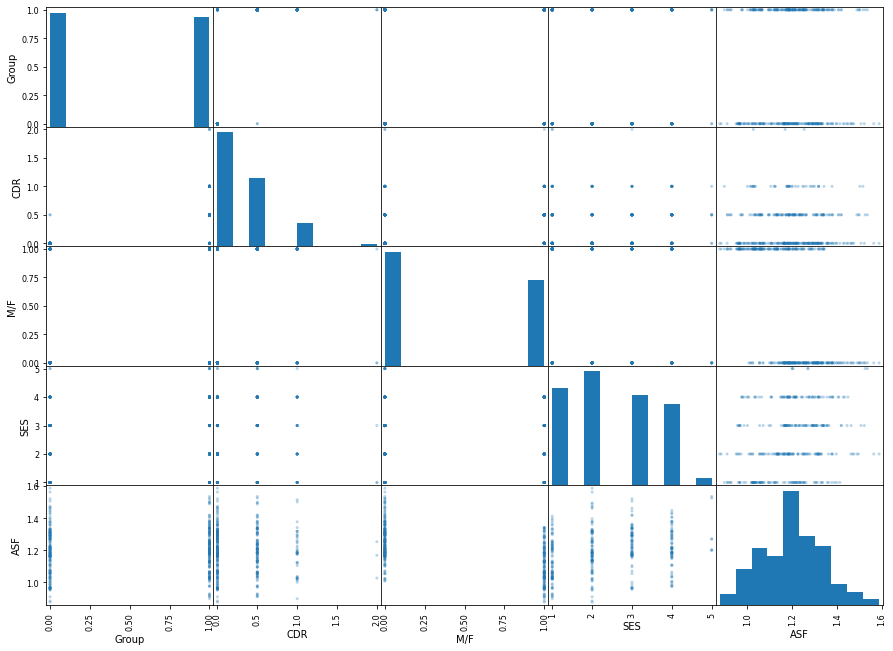

In [43]:
from pandas.plotting import scatter_matrix

attributes = ["Group", "CDR", "M/F", "SES", "ASF"]

scatter_matrix(data[attributes], figsize=(15, 11), alpha=0.3)

In [44]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='SES', color='Group')
fig.show()

In [45]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='ASF', color='Group')
fig.show()

In [46]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='Age', color='Group')
fig.show()

In [47]:
#Check null values
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [49]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           0
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [50]:
median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [48]:
df['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

In [51]:
y = data['Group'].values
X = data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [53]:
# by default test_size= 0.25
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    158
1    140
Name: 0, dtype: int64

In Testing Split:
1    43
0    32
Name: 0, dtype: int64


In [54]:
# by default test_size= 0.25
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state=42, stratify=y)


df_ytrain = pd.DataFrame(y_trainval)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    152
1    146
Name: 0, dtype: int64

In Testing Split:
0    38
1    37
Name: 0, dtype: int64


In [56]:
# here StandardScaler() means z = (x - u) / s
scaler = StandardScaler().fit(X_trainval)
#scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_trainval_scaled

array([[-0.87966444,  0.38449006, -0.87500081, ..., -0.30880564,
         0.16961408,  0.21548547],
       [ 1.13679712,  1.04832574, -0.87500081, ...,  1.23805919,
        -0.67676996, -1.21558429],
       [-0.87966444, -0.9431813 , -1.22928103, ..., -1.08511327,
         0.4605586 ,  1.14751551],
       ...,
       [-0.87966444, -0.01381135,  1.2506805 , ..., -0.92985174,
         0.01091708,  0.94202857],
       [-0.87966444, -1.20871557, -0.87500081, ..., -0.00978344,
         0.5663566 , -0.10742258],
       [-0.87966444,  0.11895579,  1.2506805 , ..., -1.38413547,
         0.4605586 ,  1.56582821]])

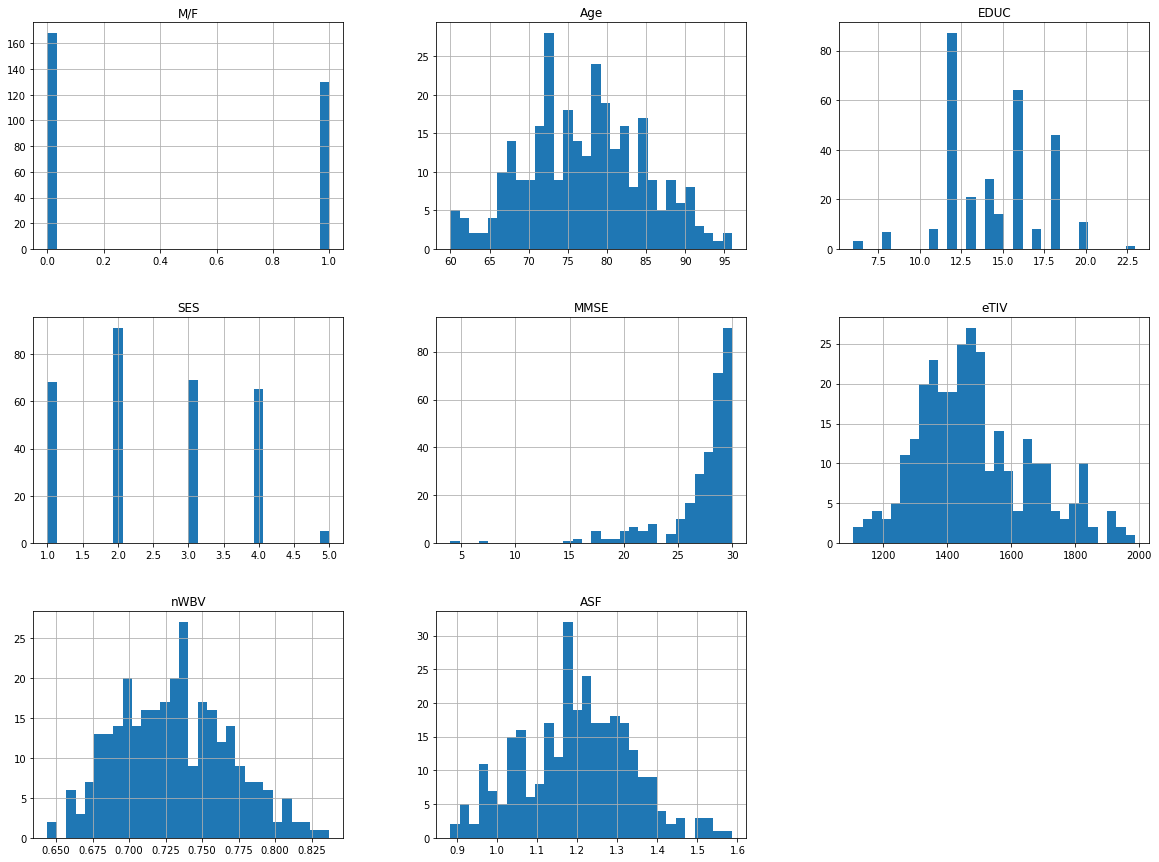

In [58]:
X_trainval.hist(bins=30, figsize=(20,15))
plt.show()

In [59]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig = px.histogram(X_trainval, x='eTIV', nbins=50)
fig.show()

In [60]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig = px.scatter(X_trainval, x='eTIV')
fig.show()

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



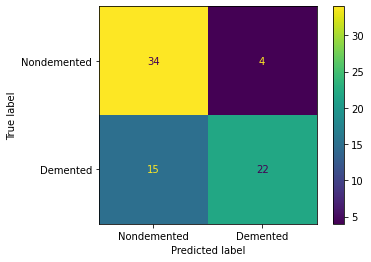

In [61]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_trainval_scaled, y_trainval)

# for test there are 94 cases
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [62]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  0.8590604026845637
Test accuracy  0.7466666666666667
Test recall 0.5945945945945946
Test AUC 0.744665718349929


In [63]:
# Normally, C = 1 and gamma = 'scale' are default values
# C controls how wide the margin will be with respect to how many misclassification we are allowing
# C is increasing --> reduce the size of the margin and fewer misclassification and vice versa
param_grid = [
    {'C': [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 80, 100],
    'gamma': ['scale', 0.5, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
]

optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_trainval_scaled, y_trainval)
print(optimal_params.best_params_)

{'C': 6, 'gamma': 1, 'kernel': 'rbf'}


In [64]:
C = optimal_params.best_params_['C']
gamma = optimal_params.best_params_['gamma']
kernel = optimal_params.best_params_['kernel']

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



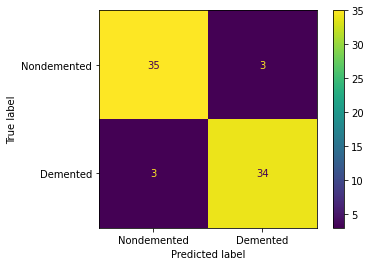

In [65]:
clf_svm = SVC(random_state=42, C=C, gamma=gamma, kernel=kernel)
clf_svm.fit(X_trainval_scaled, y_trainval)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      values_format='d', 
                      display_labels=['Nondemented', 'Demented'])

In [66]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = clf_svm.score(X_trainval_scaled, y_trainval)
test_score = clf_svm.score(X_test_scaled, y_test)
y_predict = clf_svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(svm_fpr, svm_tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  1.0
Test accuracy  0.92
Test recall 0.918918918918919
Test AUC 0.9199857752489331


In [ ]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(clf_svm,file)

In [55]:
# Percentage of patients have and do not have alzhimers disease
df['Group'].value_counts()/df.shape[0]*100 

Nondemented    50.938338
Demented       39.142091
Converted       9.919571
Name: Group, dtype: float64

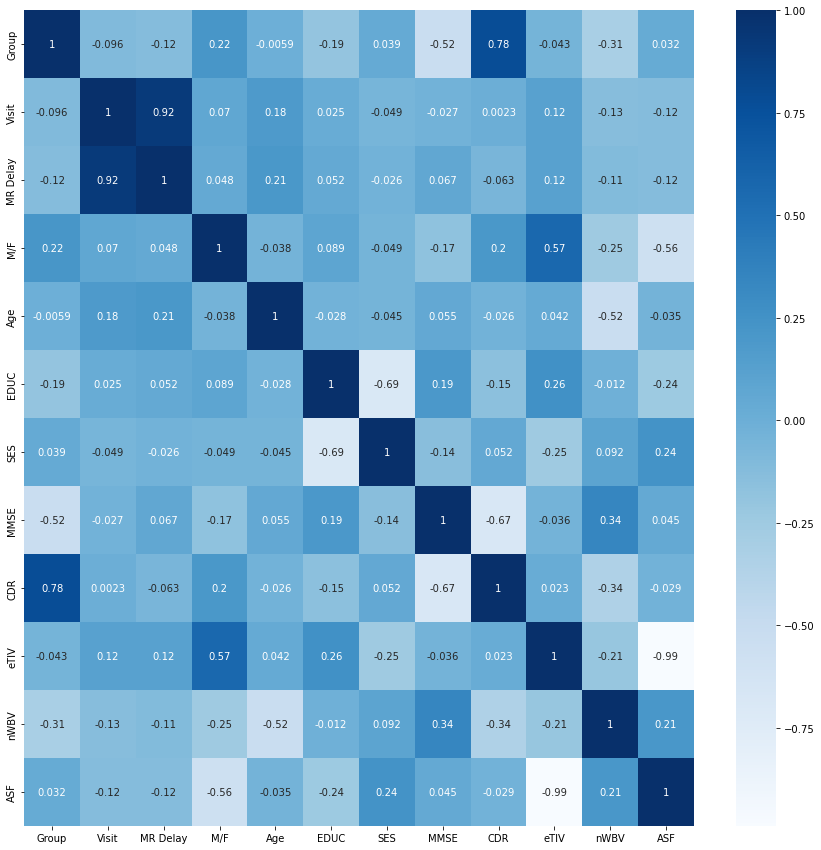

In [27]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()

In [28]:
median =df['MMSE'].median()
df['MMSE'].fillna(median, inplace=True)
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [29]:
median = df['SES'].median()
df['SES'].fillna(median, inplace=True)
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [30]:
# Initialize data and target
Group = df['Group']
features = df.drop(['Group'], axis = 1)

In [31]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, Group, test_size = 0.2, random_state = 0)

In [32]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results

In [33]:
# Initialize the models
sv = SVC(random_state = 1)
rf = RandomForestClassifier(random_state = 1)
ab = AdaBoostClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)


# Fit and evaluate models
results = {}
for cls in [sv, rf, ab, gb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

ValueError: could not convert string to float: 'OAS2_0174'